In [1]:
import pandas as pd
import re
import numpy as np
from ast import literal_eval

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')


In [2]:
prep_diff_df = pd.read_csv('prep_diff.csv')
print(prep_diff_df.shape)
prep_diff_df.head()


(778, 4)


,url,image,prep_time,difficulty
0,https://themeatmen.sg/jb-ah-meng-chao-da-bee-hoon/,https://themeatmen.sg/wp-content/uploads/2023/07/JB-Ah-Meng-Chao-Da-Bee-Hoon-scaled.jpg,['30 mins'],easy
1,https://themeatmen.sg/easy-thai-bbq-pork-collar/,https://themeatmen.sg/wp-content/uploads/2023/06/DSC09626-scaled.jpg,['20 minutes'],easy
2,https://themeatmen.sg/filipino-sinigang-na-baboy-hack/,https://themeatmen.sg/wp-content/uploads/2023/06/DSC09665-scaled.jpg,['1 hr 15 min'],easy
3,https://themeatmen.sg/mothers-day-special-manuka-honey-yogurt-parfait/,https://themeatmen.sg/wp-content/uploads/2023/05/DSC00752-1-scaled.jpg,['5 min'],easy
4,https://themeatmen.sg/mee-soto-2/,https://themeatmen.sg/wp-content/uploads/2023/04/DSC09768-scaled.jpg,['2 hour'],easy


In [3]:
meatmen_df = pd.read_csv('meatmen_scraped_raw.csv')
print(meatmen_df.shape)
meatmen_df.head(5)

(777, 5)


,url,image,ingredients,directions,recipe_name
0,https://themeatmen.sg/easy-thai-bbq-pork-collar/,https://themeatmen.sg/wp-content/uploads/2023/06/DSC09626-scaled.jpg,"['1kg Pork Collar', '2 tbsp Oyster sauce', '1 tbsp Fish sauce', '2 tbsp Light soy sauce', '1 tbsp Dark soy sauce', '4 tbsp Palm sugar', '1 tbsp White pepper powder', '1 Lemongrass', '3 Coriander roots', '4 Shallots', '3 stalks Coirander', '4-5 tbsp Fish sauce', '1 tbsp Tamarind paste', 'Juice from 1 lime', '1 tbsp Palm sugar', '1 tbsp Toasted rice powder (Khao Khua)', '1 tbsp Thai dried chilli flakes']","['1. Cut up pork collar into pork chops. Transfer to a large mixing bowl.', '2. Add oyster sauce, fish sauce, light soy sauce, dark soy sauce, palm sugar, white pepper powder, lemongrass, and coriander roots. Mix well and marinate meat.', '3. Refrigerate to marinade for at least 1 hour to overnight.', '4. To make toasted rice powder, add 1 cup of glutinous rice into a wide pan and toast over medium-low heat until lightly browned for about 8-10 minutes. Set aside to completely cool. Add toasted rice into a pestle and mortar to grind it into powder, or use a spice blender.', '5. To make Jaew แจ่ว (Thai Dried Chilli Dipping Sauce), add in sliced shallots, coriander roots, fish sauce, tamarind paste, lime juice, palm sugar, toasted rice powder. Thai dried chilli flakes into a mixing bowl and mix well. Remove coriander roots before serving.', '6. Wrap marinated pork collars in individual aluminium foils and lay on a baking tray.', '7. Cook in oven at 105°C for about 2 hours until meat is nice and tender.', '8. Remove foil from meats and lay on the baking tray, roast in the oven at 220°C for about 10 minutes on each side.', '9. Slice up pork collars, and serve with rice and dipping sauce.']",easy thai bbq pork collar
1,https://themeatmen.sg/filipino-sinigang-na-baboy-hack/,https://themeatmen.sg/wp-content/uploads/2023/06/DSC09665-scaled.jpg,"['2 tbsp Cooking oil', '1 kg Sio Bak', '4 cloves Garlic', '1 Onion', '2 Green Chillies', '1 Tomato', '1 litre Water', '1 litre Chicken Stock', '3 tbsp Fish Sauce', '1 tsp White pepper powder', '6 tbsp Tamarind paste', '1/2 Radish', '1/2 Eggplant', '200 g Taro', '200 g Lady Fingers', '100 g Kang Kong', '100 g Long beans']","['1. Cut up vegetables and aromatics and set aside.', '2. In a pot over medium heat, add 2 tbsp cooking oil. Cut up Sio bak and add into pot, pan fry until lightly charred on both sides.', '3. Push pork pieces aside and add in garlic, onion, green chilies, and tomatoes.', '4. Add water and chicken stock, season with fish sauce, white pepper powder and tamarind paste. Mix well.', '5. Cover and simmer on low heat for about 30 minutes.', '6. Add in Taro, Radish, Eggplant, Tomatoes, Lady Fingers, Long beans and Kang kong. Cover and simmer for about 15 minutes.', '7. Serve and enjoy with rice.']",filipino sinigang na baboy hack
2,https://themeatmen.sg/mothers-day-special-manuka-honey-yogurt-parfait/,https://themeatmen.sg/wp-content/uploads/2023/05/DSC00752-1-scaled.jpg,"['4 tbsp Eu Yan Sang Manuka Honey', '50 g Eu Yan Sang Organic Barbary Wolfberry Fruit', '3 packs Eu Yan Sang Herbal Cookies Chocolate Chips with Goji', '2 tbsp Eu Yan Sang Organic Chia Seeds', '2 cups Greek Yoghurt', '150 g Strawberries', '150 g Blueberries']","['1. Add in Eu Yan Sang Herbal Cookies Chocolate Chips With Goji into a zip lock bag, crush, and set aside.', '2. Cut up strawberries into cubes and prepare the garnish.', '3. In 2 glasses layer parfait, starting with Greek yogurt, crushed cookies, fruits, Wolfberries, chia seeds, Eu Yan Sang Manuka Honey, and repeat for another layer.', '4. Garnish with strawberries and serve.']",mothers day special manuka honey yogurt parfait
3,https://themeatmen.sg/mee-soto-2/,https://themeatmen.sg/wp-content/uploads/2023/04/DSC09768-scaled.jpg,"['200 g Red onions', '8 cloves Garlic', '40 g Ginger', '2 Lemongrass (white part)', '8 Candlenut', '1 tsp Turmeric powder', '1 tbsp Coriander powder', '1 tsp Cumin po

In [4]:
meatmen_df = pd.merge(prep_diff_df, meatmen_df, on=['url','image'])
print(meatmen_df.shape)
meatmen_df.head()

(777, 7)


,url,image,prep_time,difficulty,ingredients,directions,recipe_name
0,https://themeatmen.sg/easy-thai-bbq-pork-collar/,https://themeatmen.sg/wp-content/uploads/2023/06/DSC09626-scaled.jpg,['20 minutes'],easy,"['1kg Pork Collar', '2 tbsp Oyster sauce', '1 tbsp Fish sauce', '2 tbsp Light soy sauce', '1 tbsp Dark soy sauce', '4 tbsp Palm sugar', '1 tbsp White pepper powder', '1 Lemongrass', '3 Coriander roots', '4 Shallots', '3 stalks Coirander', '4-5 tbsp Fish sauce', '1 tbsp Tamarind paste', 'Juice from 1 lime', '1 tbsp Palm sugar', '1 tbsp Toasted rice powder (Khao Khua)', '1 tbsp Thai dried chilli flakes']","['1. Cut up pork collar into pork chops. Transfer to a large mixing bowl.', '2. Add oyster sauce, fish sauce, light soy sauce, dark soy sauce, palm sugar, white pepper powder, lemongrass, and coriander roots. Mix well and marinate meat.', '3. Refrigerate to marinade for at least 1 hour to overnight.', '4. To make toasted rice powder, add 1 cup of glutinous rice into a wide pan and toast over medium-low heat until lightly browned for about 8-10 minutes. Set aside to completely cool. Add toasted rice into a pestle and mortar to grind it into powder, or use a spice blender.', '5. To make Jaew แจ่ว (Thai Dried Chilli Dipping Sauce), add in sliced shallots, coriander roots, fish sauce, tamarind paste, lime juice, palm sugar, toasted rice powder. Thai dried chilli flakes into a mixing bowl and mix well. Remove coriander roots before serving.', '6. Wrap marinated pork collars in individual aluminium foils and lay on a baking tray.', '7. Cook in oven at 105°C for about 2 hours until meat is nice and tender.', '8. Remove foil from meats and lay on the baking tray, roast in the oven at 220°C for about 10 minutes on each side.', '9. Slice up pork collars, and serve with rice and dipping sauce.']",easy thai bbq pork collar
1,https://themeatmen.sg/filipino-sinigang-na-baboy-hack/,https://themeatmen.sg/wp-content/uploads/2023/06/DSC09665-scaled.jpg,['1 hr 15 min'],easy,"['2 tbsp Cooking oil', '1 kg Sio Bak', '4 cloves Garlic', '1 Onion', '2 Green Chillies', '1 Tomato', '1 litre Water', '1 litre Chicken Stock', '3 tbsp Fish Sauce', '1 tsp White pepper powder', '6 tbsp Tamarind paste', '1/2 Radish', '1/2 Eggplant', '200 g Taro', '200 g Lady Fingers', '100 g Kang Kong', '100 g Long beans']","['1. Cut up vegetables and aromatics and set aside.', '2. In a pot over medium heat, add 2 tbsp cooking oil. Cut up Sio bak and add into pot, pan fry until lightly charred on both sides.', '3. Push pork pieces aside and add in garlic, onion, green chilies, and tomatoes.', '4. Add water and chicken stock, season with fish sauce, white pepper powder and tamarind paste. Mix well.', '5. Cover and simmer on low heat for about 30 minutes.', '6. Add in Taro, Radish, Eggplant, Tomatoes, Lady Fingers, Long beans and Kang kong. Cover and simmer for about 15 minutes.', '7. Serve and enjoy with rice.']",filipino sinigang na baboy hack
2,https://themeatmen.sg/mothers-day-special-manuka-honey-yogurt-parfait/,https://themeatmen.sg/wp-content/uploads/2023/05/DSC00752-1-scaled.jpg,['5 min'],easy,"['4 tbsp Eu Yan Sang Manuka Honey', '50 g Eu Yan Sang Organic Barbary Wolfberry Fruit', '3 packs Eu Yan Sang Herbal Cookies Chocolate Chips with Goji', '2 tbsp Eu Yan Sang Organic Chia Seeds', '2 cups Greek Yoghurt', '150 g Strawberries', '150 g Blueberries']","['1. Add in Eu Yan Sang Herbal Cookies Chocolate Chips With Goji into a zip lock bag, crush, and set aside.', '2. Cut up strawberries into cubes and prepare the garnish.', '3. In 2 glasses layer parfait, starting with Greek yogurt, crushed cookies, fruits, Wolfberries, chia seeds, Eu Yan Sang Manuka Honey, and repeat for another layer.', '4. Garnish with strawberries and serve.']",mothers day special manuka honey yogurt parfait
3,https://themeatmen.sg/mee-soto-2/,https://themeatmen.sg/wp-content/uploads/2023/04/DSC09768-scaled.jpg,['2 hour'],easy,"['200 g Red onions', '8 cloves Garlic', '40 g Ginger', '2 Lemongrass (whi

In [5]:
# check for missing values 
meatmen_df.isnull().sum()

url             0
image           0
prep_time      51
difficulty      0
ingredients     0
directions      0
recipe_name     0
dtype: int64

There are 103 rows containing empty lists in `ingredients`. We will remove these.

In [6]:
meatmen_df.difficulty.unique()
difficulty_mapping = {'super easy': 1, 'easy': 2, 'medium': 3, 'hard': 4}
meatmen_df['difficulty_scale'] = meatmen_df['difficulty'].map(difficulty_mapping)


In [7]:
meatmen_df[meatmen_df['prep_time'].isnull()]


,url,image,prep_time,difficulty,ingredients,directions,recipe_name,difficulty_scale
11,https://themeatmen.sg/6-ingredients-series-3-course-valentines-day-dinner/,https://themeatmen.sg/wp-content/uploads/2023/02/DSC08343-1-scaled.jpg,NaN,super easy,[],[],6 ingredients series 3 course valentines day dinner,1
16,https://themeatmen.sg/carrot-cake-from-scratch/,https://themeatmen.sg/wp-content/uploads/2023/02/DSC04916-scaled.jpg,NaN,super easy,"['400 g Shredded White Radish', '250 g Rice flour', '50 g Tapioca flour', '600 ml Water', '1 tbsp Cooking oil', '1/2 tbsp Salt', '350 g Steamed Carrot Cake (Homemade or packet)', '4 tbsp Pork lard', '3 tbsp Minced garlic', '2 tbsp Chye Poh (wash to get rid of excess salt)', '25 g Beansprouts', '3 eggs', '1 tsp Fish sauce', '2 tbsp Kecap manis (for black version)', 'Chopped spring onions']","['1. Using a mandoline or a grater, slice radish into thin strips.', '2. Add rice flour, tapioca flour and salt into water and mix until smooth.', '3. In a wok pan over medium low heat, add cooking oil, and shredded radish.', '4. Stir fry for about 5 minutes, covering in between, add some water if the pan becomes too dry.', '5. Turn heat down to low and add in flour mixture. Mix until mixture forms a sticky paste.', '6. Transfer mixture into an oiled baking tin.', '7. Steam for 1 hour 30 minutes. Remove and set aside to room temperature, refrigerate overnight if possible.', '8. Cut carrot cake into cubes and measure out 350g.', '9. In a pan over medium heat, add in pork lard, minced garlic, Chye poh, and stir fry until fragrant.', '10. Add in carrot cake and stir fry, not moving them around too much to get a nice char.', '11. Add in fish sauce and mix well.', '12. Add in beaten eggs and leave for 1-2 minutes until nice and charred. Cut into four pieces and flip them individually.', '13. Add in bean sprouts and stir fry.', '14. Plate half of carrot cake as “White carrot cake”', '15. Chop the other half into smaller pieces and add in Kecap manis. Stir fry evenly and plate as “Black carrot cake”.', '16. Garnish with spring onions.']",carrot cake from scratch,1
18,https://themeatmen.sg/itek-tim/,https://themeatmen.sg/wp-content/uploads/2023/01/DSC00730-scaled.jpg,NaN,super easy,"['2 liters Water', '6 Duck legs', '500 g Pork ribs', '500 g Pickled Mustard Vegetables', '6 Chinese pickled plums', '4 pieces Assam skin', '2 Tomatoes', '50 g Ginger', '4 tbsp Shaoxing wine', '1 tsp Salt to taste', 'Pickled chillies']","['1. In a pot of boiling water, add in pork ribs and blanch for about 10 minutes.', '2. In a new pot of boiling water, add duck legs, blanch for about 10 minutes.', '3. In a fresh pot, add duck legs and pork ribs over medium heat. Add cut pickled mustard vegetables, sliced ginger, assam skin, pickled plums, water and salt.', '4. Cover and simmer for about 1 hour-1.5 hours', '5. Add tomatoes and Shaoxing wine. Cook for about 15 minutes.', '6. Serve hot.']",itek tim,1
28,https://themeatmen.sg/shrimp-mapo-tofu/,https://themeatmen.sg/wp-content/uploads/2023/01/DSC00404-scaled.jpg,NaN,super easy,"['450 g Fortune Silken Tofu', '200 g Shrimp (chopped)', '1 inch knob Ginger (minced)', ""1 Bird's Eye Chilli (chopped)"", '1/2 tsp Sichuan Peppercorns', '2 tbsp Cooking oil', '1 tbsp Chilli Bean Sauce (Doubanjiang)', '1/2 tbsp Fermented black beans', '1 tbsp Sichuan Red Pepper Flakes', '1cup Water', '1/2 tsp (24 twists on fine) McCormick Himalayan Pink Salt', '1/2 tsp (24 twists on fine) McCormick Black Pepper', '1/2 tsp Dark soy sauce', '4 tbsp Cornstarch solution (2:2 cornstarch to water)', 'Spring Onion']","['1. Roughly chop shrimp into small pieces. Cut tofu into cubes.', '2. In a wokpan over medium heat, add 2 tbsp cooking oil. Add ginger, chilli, szechuan peppercorns and stir fry until fragrant. Add Shrimp, season with McCormick Himalayan Pink Salt/McCormick Iodized Sea Salt, McCormick Black Pepper and stir fry.', '3. Add chilli bean sauce, fermented black beans, sichuan red pepper flakes and mix well.', '4. 

In [8]:
# check for empty lists in ingredients and directions
empty_ingredients = meatmen_df[meatmen_df['ingredients'] == '[]']
print(empty_ingredients.shape)
print(empty_ingredients)

empty_directions = meatmen_df[meatmen_df['directions'] == '[]']
print(empty_directions.shape)
print(empty_directions)

(103, 8)
                                                                                                           url  \
7                                                              https://themeatmen.sg/4-ways-to-use-monk-fruit/   
11                                  https://themeatmen.sg/6-ingredients-series-3-course-valentines-day-dinner/   
87                                                          https://themeatmen.sg/coffee-sauce-by-kek-seafood/   
89                                                                     https://themeatmen.sg/chilli-crab-tofu/   
95                                                     https://themeatmen.sg/lamb-ribs-with-furikake-by-hamzi/   
108                                                                          https://themeatmen.sg/kueh-talam/   
147                                           https://themeatmen.sg/air-fryer-chicken-thighs-marinated-3-ways/   
149                                               https://themeatmen.sg/seafood

In [9]:
meatmen_df = meatmen_df[meatmen_df['ingredients'] != '[]'] #filtering out recipes that contain empty lists 
meatmen_df = meatmen_df[meatmen_df['directions'] != '[]'] #filtering out recipes that contain empty directions 
print(meatmen_df.shape)

meatmen_df.to_csv('meatmen_scraped_filtered.csv', index=False)

(668, 8)


In [10]:
ingredients_df = meatmen_df[['recipe_name','ingredients']]

ingredients_df['n_directions'] = meatmen_df['directions'].apply(literal_eval).apply(len)

ingredients_df.head()

,recipe_name,ingredients,n_directions
0,easy thai bbq pork collar,"['1kg Pork Collar', '2 tbsp Oyster sauce', '1 tbsp Fish sauce', '2 tbsp Light soy sauce', '1 tbsp Dark soy sauce', '4 tbsp Palm sugar', '1 tbsp White pepper powder', '1 Lemongrass', '3 Coriander roots', '4 Shallots', '3 stalks Coirander', '4-5 tbsp Fish sauce', '1 tbsp Tamarind paste', 'Juice from 1 lime', '1 tbsp Palm sugar', '1 tbsp Toasted rice powder (Khao Khua)', '1 tbsp Thai dried chilli flakes']",9
1,filipino sinigang na baboy hack,"['2 tbsp Cooking oil', '1 kg Sio Bak', '4 cloves Garlic', '1 Onion', '2 Green Chillies', '1 Tomato', '1 litre Water', '1 litre Chicken Stock', '3 tbsp Fish Sauce', '1 tsp White pepper powder', '6 tbsp Tamarind paste', '1/2 Radish', '1/2 Eggplant', '200 g Taro', '200 g Lady Fingers', '100 g Kang Kong', '100 g Long beans']",7
2,mothers day special manuka honey yogurt parfait,"['4 tbsp Eu Yan Sang Manuka Honey', '50 g Eu Yan Sang Organic Barbary Wolfberry Fruit', '3 packs Eu Yan Sang Herbal Cookies Chocolate Chips with Goji', '2 tbsp Eu Yan Sang Organic Chia Seeds', '2 cups Greek Yoghurt', '150 g Strawberries', '150 g Blueberries']",4
3,mee soto 2,"['200 g Red onions', '8 cloves Garlic', '40 g Ginger', '2 Lemongrass (white part)', '8 Candlenut', '1 tsp Turmeric powder', '1 tbsp Coriander powder', '1 tsp Cumin powder', '3 tbsp Water', '4 tbsp Cooking oil', '20 Cardamom pods', '5 Star anise', '10 Cloves', '1 Cinnamon stick', '1 whole Chicken', '2 litres Water', '2 tbsp Salt', '1 tbsp Sugar', '500 g Yellow noodles', '200 g Beansprouts', '4 boiled Eggs', 'Fried Shallots', 'Coriander']",9
4,yakiniku donburi,"['250 g Iberico Presa', '250 g Iberico Pluma', '250g Iberico Secreto', '4 tbsp Light soy sauce', '3 tbsp Honey', '3 tbsp Sake', '3 tbsp Mirin', '2 tbsp Vinegar', '2 tbsp Sesame oil', '1 tbsp Grated garlic', '1 Apple', '2 tbsp Cooking oil', 'Salt and pepper to taste', '4 tbsp Furikake', '4 cups Japanese rice', 'Poached egg', 'Toasted Sesame seeds']",8


In [11]:
# Convert the strings into lists - comment this after first run
ingredients_df['ingredients'] = ingredients_df['ingredients'].apply(literal_eval) 

def extract_ingredients(ingredients_list):
    # The regex pattern to split at numbers, fractions, and measurement units
    pattern = re.compile(r'\d+-\d+|\d+|\d+\/\d+|\bcup\b|\bkg\b|\bcube\b|\bcubes\b|\bof\b|\bknob\b|\btbs\b|\bfrom\b|\bwith\b|\btbsp\b|\btsp\b|\bml\b|\bg\b|\boz\b|\bteaspoon\b|\btablespoon\b|\blitres\b|\blitre\b|\bcups\b|\bpack\b|\bpacks\b|\bpinch\b|\bcan\b|\bslice\b|\bstalk\b|\bpiece\b|½|¼|⅛|¾|⅓', re.IGNORECASE)

    # Split the strings at the pattern, and remove leading/trailing whitespace from each split string
    ex_ingredients = []
    for ingredient in ingredients_list:
        ingredient = re.sub(pattern, '', ingredient).strip()
        ingredient = ingredient.lower()
        ingredient = re.sub(pattern, '', ingredient).strip()
        ex_ingredients.append(ingredient)
    
    return ex_ingredients

# Apply the function to the 'ingredients' column
ingredients_df['ingredients_ex'] = ingredients_df['ingredients'].apply(extract_ingredients)



ingredients_df.head()






,recipe_name,ingredients,n_directions,ingredients_ex
0,easy thai bbq pork collar,"[1kg Pork Collar, 2 tbsp Oyster sauce, 1 tbsp Fish sauce, 2 tbsp Light soy sauce, 1 tbsp Dark soy sauce, 4 tbsp Palm sugar, 1 tbsp White pepper powder, 1 Lemongrass, 3 Coriander roots, 4 Shallots, 3 stalks Coirander, 4-5 tbsp Fish sauce, 1 tbsp Tamarind paste, Juice from 1 lime, 1 tbsp Palm sugar, 1 tbsp Toasted rice powder (Khao Khua), 1 tbsp Thai dried chilli flakes]",9,"[pork collar, oyster sauce, fish sauce, light soy sauce, dark soy sauce, palm sugar, white pepper powder, lemongrass, coriander roots, shallots, stalks coirander, fish sauce, tamarind paste, juice lime, palm sugar, toasted rice powder (khao khua), thai dried chilli flakes]"
1,filipino sinigang na baboy hack,"[2 tbsp Cooking oil, 1 kg Sio Bak, 4 cloves Garlic, 1 Onion, 2 Green Chillies, 1 Tomato, 1 litre Water, 1 litre Chicken Stock, 3 tbsp Fish Sauce, 1 tsp White pepper powder, 6 tbsp Tamarind paste, 1/2 Radish, 1/2 Eggplant, 200 g Taro, 200 g Lady Fingers, 100 g Kang Kong, 100 g Long beans]",7,"[cooking oil, sio bak, cloves garlic, onion, green chillies, tomato, water, chicken stock, fish sauce, white pepper powder, tamarind paste, / radish, / eggplant, taro, lady fingers, kang kong, long beans]"
2,mothers day special manuka honey yogurt parfait,"[4 tbsp Eu Yan Sang Manuka Honey, 50 g Eu Yan Sang Organic Barbary Wolfberry Fruit, 3 packs Eu Yan Sang Herbal Cookies Chocolate Chips with Goji, 2 tbsp Eu Yan Sang Organic Chia Seeds, 2 cups Greek Yoghurt, 150 g Strawberries, 150 g Blueberries]",4,"[eu yan sang manuka honey, eu yan sang organic barbary wolfberry fruit, eu yan sang herbal cookies chocolate chips goji, eu yan sang organic chia seeds, greek yoghurt, strawberries, blueberries]"
3,mee soto 2,"[200 g Red onions, 8 cloves Garlic, 40 g Ginger, 2 Lemongrass (white part), 8 Candlenut, 1 tsp Turmeric powder, 1 tbsp Coriander powder, 1 tsp Cumin powder, 3 tbsp Water, 4 tbsp Cooking oil, 20 Cardamom pods, 5 Star anise, 10 Cloves, 1 Cinnamon stick, 1 whole Chicken, 2 litres Water, 2 tbsp Salt, 1 tbsp Sugar, 500 g Yellow noodles, 200 g Beansprouts, 4 boiled Eggs, Fried Shallots, Coriander]",9,"[red onions, cloves garlic, ginger, lemongrass (white part), candlenut, turmeric powder, coriander powder, cumin powder, water, cooking oil, cardamom pods, star anise, cloves, cinnamon stick, whole chicken, water, salt, sugar, yellow noodles, beansprouts, boiled eggs, fried shallots, coriander]"
4,yakiniku donburi,"[250 g Iberico Presa, 250 g Iberico Pluma, 250g Iberico Secreto, 4 tbsp Light soy sauce, 3 tbsp Honey, 3 tbsp Sake, 3 tbsp Mirin, 2 tbsp Vinegar, 2 tbsp Sesame oil, 1 tbsp Grated garlic, 1 Apple, 2 tbsp Cooking oil, Salt and pepper to taste, 4 tbsp Furikake, 4 cups Japanese rice, Poached egg, Toasted Sesame seeds]",8,"[iberico presa, iberico pluma, iberico secreto, light soy sauce, honey, sake, mirin, vinegar, sesame oil, grated garlic, apple, cooking oil, salt and pepper to taste, furikake, japanese rice, poached egg, toasted sesame seeds]"


In [12]:
ingred_ex_df = ingredients_df[['recipe_name','ingredients_ex', 'n_directions']]
ingred_ex_df.to_csv('ex_ingred_name.csv', index=False)
ingred_ex_df.head()

,recipe_name,ingredients_ex,n_directions
0,easy thai bbq pork collar,"[pork collar, oyster sauce, fish sauce, light soy sauce, dark soy sauce, palm sugar, white pepper powder, lemongrass, coriander roots, shallots, stalks coirander, fish sauce, tamarind paste, juice lime, palm sugar, toasted rice powder (khao khua), thai dried chilli flakes]",9
1,filipino sinigang na baboy hack,"[cooking oil, sio bak, cloves garlic, onion, green chillies, tomato, water, chicken stock, fish sauce, white pepper powder, tamarind paste, / radish, / eggplant, taro, lady fingers, kang kong, long beans]",7
2,mothers day special manuka honey yogurt parfait,"[eu yan sang manuka honey, eu yan sang organic barbary wolfberry fruit, eu yan sang herbal cookies chocolate chips goji, eu yan sang organic chia seeds, greek yoghurt, strawberries, blueberries]",4
3,mee soto 2,"[red onions, cloves garlic, ginger, lemongrass (white part), candlenut, turmeric powder, coriander powder, cumin powder, water, cooking oil, cardamom pods, star anise, cloves, cinnamon stick, whole chicken, water, salt, sugar, yellow noodles, beansprouts, boiled eggs, fried shallots, coriander]",9
4,yakiniku donburi,"[iberico presa, iberico pluma, iberico secreto, light soy sauce, honey, sake, mirin, vinegar, sesame oil, grated garlic, apple, cooking oil, salt and pepper to taste, furikake, japanese rice, poached egg, toasted sesame seeds]",8


In [13]:
ingred_ex_df['n_all_ingredients'] = ingred_ex_df['ingredients_ex'].apply(len)

ingred_ex_df.head()


,recipe_name,ingredients_ex,n_directions,n_all_ingredients
0,easy thai bbq pork collar,"[pork collar, oyster sauce, fish sauce, light soy sauce, dark soy sauce, palm sugar, white pepper powder, lemongrass, coriander roots, shallots, stalks coirander, fish sauce, tamarind paste, juice lime, palm sugar, toasted rice powder (khao khua), thai dried chilli flakes]",9,17
1,filipino sinigang na baboy hack,"[cooking oil, sio bak, cloves garlic, onion, green chillies, tomato, water, chicken stock, fish sauce, white pepper powder, tamarind paste, / radish, / eggplant, taro, lady fingers, kang kong, long beans]",7,17
2,mothers day special manuka honey yogurt parfait,"[eu yan sang manuka honey, eu yan sang organic barbary wolfberry fruit, eu yan sang herbal cookies chocolate chips goji, eu yan sang organic chia seeds, greek yoghurt, strawberries, blueberries]",4,7
3,mee soto 2,"[red onions, cloves garlic, ginger, lemongrass (white part), candlenut, turmeric powder, coriander powder, cumin powder, water, cooking oil, cardamom pods, star anise, cloves, cinnamon stick, whole chicken, water, salt, sugar, yellow noodles, beansprouts, boiled eggs, fried shallots, coriander]",9,23
4,yakiniku donburi,"[iberico presa, iberico pluma, iberico secreto, light soy sauce, honey, sake, mirin, vinegar, sesame oil, grated garlic, apple, cooking oil, salt and pepper to taste, furikake, japanese rice, poached egg, toasted sesame seeds]",8,17


In [14]:
from collections import Counter
import matplotlib.pyplot as plt

# Combine all of the ingredient names into a single list
all_ingredients = []
for sublist in ingred_ex_df['ingredients_ex']:
    for ingredient in sublist:
        all_ingredients.append(ingredient)
        
# Count the frequency of each ingredient
ingredient_counts = Counter(all_ingredients)

print(len(ingredient_counts))

3799


There are 3,834 unique ingredients. Clearly, much preprocessing is required after the earlier extraction step. 

For consistency, we will:
- singularise the ingredients, e.g. `carrots` as `carrot`
- aggregate and generalise different subtypes (e.g. `black pepper`, `white pepper`, `black pepper powder` as `pepper`, `cooking oil`, `olive oil`, `canola oil` as `oil`, etc)
- `red chilli padi`, `chili padi` can be generalised as `red chilli`
- group `chicken breast`, `lean chicken` together with `chicken` 
- group `small onion`, `shallot` together with `onion` 
- group `light soy sauce`, `dark soy sauce` and `sweet soy sauce` together with `soy sauce`

We also observe that not all of them are key ingredients, e.g. common condiments such as sauces, seasoning, salt, oil, etc. For a meaningful recommendation, we should focus on the key ingredients, and expect that common condiments would be available in the kitchen. This will help in the eventual recommendation engine where users will only need to key in sources of meat/veg/fruits/carb which are key ingredients to recipes. 

common condiments to remove: 
- `oil`, `salt`, `pepper`, `soy sauce`, `sesame oil`, `tomato ketchup`, `garlic chilli sauce`, `fish sauce`, `oyster sauce`, `cornstarch`

we shall also remove descriptors to prevent self-limitation: 
- e.g.`low-fat`, `wholegrain`, `lean`


In [15]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sandratan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [16]:
# Define the replacements
replacements = {
    r'vermicelli':'bee hoon', 
    r'chicken breast':'chicken', 
    r'lean chicken':'chicken', 
    r'^dried shiitake mushroom$':'dried mushroom', 
    r'^red onion$':'onion', 
    r'^shallot$':'onion', 
    r'^small onion$':'onion', 
    r'^dark soy sauce$':'soy sauce', 
    r'^light soy sauce$':'soy sauce',
    r'^sweet soy sauce$':'soy sauce',
    r'^soya sauce$':'soy sauce',
    r'fried shallots': 'shallots',
    r'.*egg.*': 'egg',
    r'\bonion\b': 'onion',
    r'\bginger\b': 'ginger',
    r'\bgalangal?\b': 'ginger',
    r'\blemon\b': 'lemon',
    r'\bgarlic\b': 'garlic',
    r'\byogurt\b': 'yogurt',
    r'\bparsley\b': 'parsley',
    r'\bprawn\b': 'prawn', 
    r'\b(chil(?:i|ie|ies|li|lis|lies))\b': 'chilli', 
    r'\b(peppers?|peppercorn)\b': 'pepper', 
    r'\bsalt\b': 'salt', 
    r'\boil\b': 'oil', 
    r'\bvinegar\b': 'vinegar', 
    r'\bflour\b': 'flour',
    r'\bbutter\b': 'butter', 
    r'\bwater\b': 'water', 
    r'\btofu\b': 'tofu', 
    r'\bnoodles?\b': 'noodle', 
    r'chicken(?!\s(stock|broth|powder))':'chicken',
    r'pork(?!\s(stock|broth|powder))':'pork',
    r'beef(?!\s(stock|broth|powder))':'beef', 
    r'(?<!glutinous\s)rice(?!\s(stock|broth|vermicelli|beehoon|bee hoon|noodales|noodle|penne|crackers|risotto|glutinous))':'rice', 
    r'.*stock.*': 'stock',    
    r'.*peanut.*': 'peanut', 
    r'mushroom(?!\s(ball))':'mushroom', 
    r'.*lime.*': 'lime',
    r'milk(?!\s(coconut))':'milk', 
    r'carrot(?!\s(cake|juice))':'carrot', 
    r'.*sausage.*':'sausage', 
    r'(?<!sweet )potato(es)?':'potato', 
    r'barramundi|fish fillet|snapper|seabass|salmon':'fish',
    r'fish(?! (bones|powder|balls?))':'fish', 
    r'chicken broth':'chicken broth', 
    r'apple':'apple', 
    r'duck':'duck', 
    r'\btomato(es)?\b(?! paste)':'tomato', 
    r'orange':'orange', 
    r'coriander':'coriander', 
    r'(?<!sea )cucumber':'cucumber', 
    r'\bbanana(s)?\b(?! leaf|leaves)':'banana', 
    r'cabbage':'cabbage', 
    r'lamb':'lamb', 
    r'vegetables':'vegetables', 
    r'tau kwa':'tau kwa', 
    r'abalone':'abalone', 
    r'shallot(s)?':'shallot', 
    r'sweet potato(es)?':'sweet potato',
    r'\bsugars?\b': 'sugar',

}

# Define the descriptors
descriptors = ['grated', 'salt and pepper to taste', 'toasted', 'salt (to taste)', 'salt to taste', 'for deep frying',
               '(minced)', '(sliced)', 'solution', 'chopped', 'for frying', 'for deep-frying', 'for deep fry',
               '(shelled and deveined)', '(lightly beaten)', 'large', 'salt and white pepper to taste', '(bruised)',
               'pepper to taste', 'salt & pepper to taste', 'with', '(adjust to taste)', 'black pepper to taste',
               'fresh coriander for garnish', 'cracked', 'for garnish', 'fresh', 'for cooking', 'for blanching', '(adjust to preference)',
               'optional','quartered','washed', 'garnish', 'serve']

# Define the function to process ingredients
def process_ingredient(ingredient):
    
    # Lemmatization
    ingredient = lemmatizer.lemmatize(ingredient)
    
    # Standardize Ingredient Names
    ingredient = 'chicken breast' if ingredient == 'chicken breasts' else ingredient
    
    # Remove Descriptors and Units
    for descriptor in descriptors:
        ingredient = ingredient.replace(descriptor, '')
        
    # Remove units
    units = ['cloves', 'inch','stalks', 'bulb', 'sprigs', 'slices', '/']
    
    for unit in units:
        ingredient = ingredient.replace(unit, '')
    
    unit_r = [r'\bdash\b']
    
    for unit in unit_r:
        ingredient = re.sub(unit, '', ingredient)
    
    # Group Similar Ingredients
    for pattern, replacement in replacements.items():
        if re.search(pattern, ingredient, re.IGNORECASE):
            ingredient = replacement
   
    return ingredient.strip()  # remove leading and trailing whitespace

# Apply the function to the 'ingredients_ex' column
ingred_ex_df['ingredients_processed'] = ingred_ex_df['ingredients_ex'].apply(lambda x: [process_ingredient(ingredient) for ingredient in x])

ingred_ex_df.head()



,recipe_name,ingredients_ex,n_directions,n_all_ingredients,ingredients_processed
0,easy thai bbq pork collar,"[pork collar, oyster sauce, fish sauce, light soy sauce, dark soy sauce, palm sugar, white pepper powder, lemongrass, coriander roots, shallots, stalks coirander, fish sauce, tamarind paste, juice lime, palm sugar, toasted rice powder (khao khua), thai dried chilli flakes]",9,17,"[pork, oyster sauce, fish, soy sauce, soy sauce, sugar, pepper, lemongrass, coriander, onion, coirander, fish, tamarind paste, lime, sugar, rice, chilli]"
1,filipino sinigang na baboy hack,"[cooking oil, sio bak, cloves garlic, onion, green chillies, tomato, water, chicken stock, fish sauce, white pepper powder, tamarind paste, / radish, / eggplant, taro, lady fingers, kang kong, long beans]",7,17,"[oil, sio bak, garlic, onion, chilli, tomato, water, stock, fish, pepper, tamarind paste, radish, egg, taro, lady fingers, kang kong, long beans]"
2,mothers day special manuka honey yogurt parfait,"[eu yan sang manuka honey, eu yan sang organic barbary wolfberry fruit, eu yan sang herbal cookies chocolate chips goji, eu yan sang organic chia seeds, greek yoghurt, strawberries, blueberries]",4,7,"[eu yan sang manuka honey, eu yan sang organic barbary wolfberry fruit, eu yan sang herbal cookies chocolate chips goji, eu yan sang organic chia seeds, greek yoghurt, strawberry, blueberry]"
3,mee soto 2,"[red onions, cloves garlic, ginger, lemongrass (white part), candlenut, turmeric powder, coriander powder, cumin powder, water, cooking oil, cardamom pods, star anise, cloves, cinnamon stick, whole chicken, water, salt, sugar, yellow noodles, beansprouts, boiled eggs, fried shallots, coriander]",9,23,"[red onions, garlic, ginger, lemongrass (white part), candlenut, turmeric powder, coriander, cumin powder, water, oil, cardamom pods, star anise, clove, cinnamon stick, chicken, water, salt, sugar, noodle, beansprouts, egg, shallot, coriander]"
4,yakiniku donburi,"[iberico presa, iberico pluma, iberico secreto, light soy sauce, honey, sake, mirin, vinegar, sesame oil, grated garlic, apple, cooking oil, salt and pepper to taste, furikake, japanese rice, poached egg, toasted sesame seeds]",8,17,"[iberico presa, iberico pluma, iberico secreto, soy sauce, honey, sake, mirin, vinegar, oil, garlic, apple, oil, , furikake, rice, egg, sesame seeds]"


In [17]:
# Now, we can define the condiments and herbs lists, including the renamed condiment-type ingredients
condiments = ['pepper', 'sugar', 'salt', 'oil', 'vinegar', 'flour', 'butter', 'water', 
              'oyster sauce', 'fish sauce', 'light soy sauce', 'dark soy sauce', 'palm sugar', 
              'white pepper powder', 'cooking oil', 'sesame oil', 'ketchup', 'rock sugar', 'cornstarch', 
              'rice flour', 'tapioca flour', 'hua tiao wine', 'shaoxing wine', 'plain flour', 
              'glutinous rice flour', 'baking soda', 'sake', 'mirin', 'sambal belacan', 'belacan',
              'dried chilli paste', 'white pepper', 'brown sugar', 'hoisin sauce', 'abalone sauce', 
              'white peppercorns', 'plum sauce', 'white vinegar', 'olive oil', 'unsalted butter', 
              'soy sauce', 'apple cider vinegar', 'chinese rice wine', 'black pepper', 'dijon mustard', 
              'kecap manis', 'black peppercorns', 'rice vinegar', 'black vinegar', 'cooking wine', 'rice wine', 'rice syrup', 
              'baking powder', 'vanilla extract', 'xo sauce', 'corn', 'tapioca starch', 'soya sauce', 'shortening',
              'sodium bicarbonate', 'boiling water', 'self raising flour', 'gula melaka','sauce','instant yeast','potato starch']

herbs = ['lemongrass', 'candlenut', 'turmeric powder', 'coriander powder', 'cumin powder', 
         'star anise', 'clove', 'cinnamon stick', 'spice powder', 'five spice powder', 
         'cinnamon', 'bay leaves', 'worcestershire sauce', 'thyme', 'mint leaves', 
         'kaffir lime leaves', 'coriander seeds', 'black fungus', 'huiji waist tonic']

# Function to extract key ingredients
def extract_key_ingredients(ingredients):
    key_ingredients = []
    for ingredient in ingredients:
        if not any(condiment in ingredient for condiment in condiments) and not any(herb in ingredient for herb in herbs):
            key_ingredients.append(ingredient)
    return key_ingredients

# Create col for 'key_ingredients'
ingred_ex_df['key_ingredients'] = ingred_ex_df['ingredients_processed'].apply(extract_key_ingredients)


def remove_empty_strings(ingredient_list):
    return [ingredient for ingredient in ingredient_list if ingredient]

ingred_ex_df['key_ingredients'] = ingred_ex_df['key_ingredients'].apply(remove_empty_strings)


ingred_ex_df.head()

,recipe_name,ingredients_ex,n_directions,n_all_ingredients,ingredients_processed,key_ingredients
0,easy thai bbq pork collar,"[pork collar, oyster sauce, fish sauce, light soy sauce, dark soy sauce, palm sugar, white pepper powder, lemongrass, coriander roots, shallots, stalks coirander, fish sauce, tamarind paste, juice lime, palm sugar, toasted rice powder (khao khua), thai dried chilli flakes]",9,17,"[pork, oyster sauce, fish, soy sauce, soy sauce, sugar, pepper, lemongrass, coriander, onion, coirander, fish, tamarind paste, lime, sugar, rice, chilli]","[pork, fish, coriander, onion, coirander, fish, tamarind paste, lime, rice, chilli]"
1,filipino sinigang na baboy hack,"[cooking oil, sio bak, cloves garlic, onion, green chillies, tomato, water, chicken stock, fish sauce, white pepper powder, tamarind paste, / radish, / eggplant, taro, lady fingers, kang kong, long beans]",7,17,"[oil, sio bak, garlic, onion, chilli, tomato, water, stock, fish, pepper, tamarind paste, radish, egg, taro, lady fingers, kang kong, long beans]","[sio bak, garlic, onion, chilli, tomato, stock, fish, tamarind paste, radish, egg, taro, lady fingers, kang kong, long beans]"
2,mothers day special manuka honey yogurt parfait,"[eu yan sang manuka honey, eu yan sang organic barbary wolfberry fruit, eu yan sang herbal cookies chocolate chips goji, eu yan sang organic chia seeds, greek yoghurt, strawberries, blueberries]",4,7,"[eu yan sang manuka honey, eu yan sang organic barbary wolfberry fruit, eu yan sang herbal cookies chocolate chips goji, eu yan sang organic chia seeds, greek yoghurt, strawberry, blueberry]","[eu yan sang manuka honey, eu yan sang organic barbary wolfberry fruit, eu yan sang herbal cookies chocolate chips goji, eu yan sang organic chia seeds, greek yoghurt, strawberry, blueberry]"
3,mee soto 2,"[red onions, cloves garlic, ginger, lemongrass (white part), candlenut, turmeric powder, coriander powder, cumin powder, water, cooking oil, cardamom pods, star anise, cloves, cinnamon stick, whole chicken, water, salt, sugar, yellow noodles, beansprouts, boiled eggs, fried shallots, coriander]",9,23,"[red onions, garlic, ginger, lemongrass (white part), candlenut, turmeric powder, coriander, cumin powder, water, oil, cardamom pods, star anise, clove, cinnamon stick, chicken, water, salt, sugar, noodle, beansprouts, egg, shallot, coriander]","[red onions, garlic, ginger, coriander, cardamom pods, chicken, noodle, beansprouts, egg, shallot, coriander]"
4,yakiniku donburi,"[iberico presa, iberico pluma, iberico secreto, light soy sauce, honey, sake, mirin, vinegar, sesame oil, grated garlic, apple, cooking oil, salt and pepper to taste, furikake, japanese rice, poached egg, toasted sesame seeds]",8,17,"[iberico presa, iberico pluma, iberico secreto, soy sauce, honey, sake, mirin, vinegar, oil, garlic, apple, oil, , furikake, rice, egg, sesame seeds]","[iberico presa, iberico pluma, iberico secreto, honey, garlic, apple, furikake, rice, egg, sesame seeds]"


In [18]:
# Adding new descriptors and units to be removed or handled
new_units = ['cm', 'bunch', 'pcs','medium','servings','gram', 'size', 'small', 'large', 'approx.','dried', '%','fresh', 'toasted', 'chopped', 'sliced', 'pieces','optional', 'preferably']

# Updating the list of descriptors and units
descriptors_units = descriptors + new_units

def process_ingredient_v2(ingredient):
    
    # Step 1: Remove Descriptors and Units
    for descriptor_unit in descriptors_units:
        ingredient = ingredient.replace(descriptor_unit, '')
    
    # Step 2: Remove content within brackets
    ingredient = re.sub(r'\([^)]*\)', '', ingredient)
    ingredient = re.sub(r'\(\)', '', ingredient)

    # Step 3: Standardize Ingredient Names
    ingredient = 'chicken breast' if ingredient == 'chicken breasts' else ingredient
    
    # Step 4: Group Similar Ingredients
    for pattern, replacement in replacements.items():
        if re.search(pattern, ingredient, re.IGNORECASE):
            ingredient = replacement
    
     
#     # Step 5: Remove Rare Ingredients
#     # We'll use the Counter class to count the ingredients and keep only those with count >= 5
#     ingredient_counts = Counter(all_ingredients)
#     ingredient = ingredient if ingredient_counts[ingredient] >= 5 else ''
    
    return ingredient.strip()  # remove leading and trailing whitespace

# Apply the function to the 'key_ingredients' column
ingred_ex_df['ingredients_processed'] = ingred_ex_df['ingredients_processed'].apply(lambda ingredients: [process_ingredient_v2(ingredient) for ingredient in ingredients])

ingred_ex_df['ingredients_processed'] = ingred_ex_df['ingredients_processed'].apply(remove_empty_strings)

# update 'key_ingredients'
ingred_ex_df['key_ingredients'] = ingred_ex_df['ingredients_processed'].apply(extract_key_ingredients)
ingred_ex_df['key_ingredients'] = ingred_ex_df['key_ingredients'].apply(remove_empty_strings)

ingred_ex_df.sample(5)




,recipe_name,ingredients_ex,n_directions,n_all_ingredients,ingredients_processed,key_ingredients
575,black hokkien mee,"[thick yellow noodles (or flat yellow noodles), sliced pork belly, salt, cornflour, shrimp (shelled and deveined), small squid (sliced), fried crispy pork fat, cloves garlic (minced), beijing cabbage (roughly chopped), mustard greens (cut into cm length, stem and leaf separated, dark caramel sauce, light soya sauce, or to taste, dried sole powder, pepper to taste, . chicken stock, pork lard]",11,16,"[noodle, pork, salt, cornflour, shrimp, squid, pork, garlic, cabbage, mustard greens (cut into length, stem and leaf separated, dark caramel sauce, light soya sauce, or to taste, sole powder, stock, pork]","[noodle, pork, shrimp, squid, pork, garlic, cabbage, mustard greens (cut into length, stem and leaf separated, sole powder, stock, pork]"
357,claypot prawn glass noodles,"[glass noodles, large prawns, bacon, cloves garlic, ginger, white peppercorns, coriander roots, oyster sauce, hua tiao wine, dark soy sauce, sesame oil, . fish sauce, sugar, chicken stock, spring onions for garnish, coriander for garnish]",8,16,"[noodle, prawns, bacon, garlic, ginger, white peppercorns, coriander, oyster sauce, hua tiao wine, soy sauce, oil, fish, sugar, stock, spring onions, coriander]","[noodle, prawns, bacon, garlic, ginger, coriander, fish, stock, spring onions, coriander]"
154,stir fried pork with mushrooms,"[pork shoulder (sliced thinly into shreds), ginger (sliced thinly into match-sticks), minced garlic, shimeji mushrooms, oyster mushrooms, sesame oil, cornstarch solution ( cornstarch water), light soy sauce, mushroom seasoning, sugar, shaoxing wine]",5,11,"[pork, ginger, garlic, mushroom, mushroom, oil, water, soy sauce, mushroom, sugar, shaoxing wine]","[pork, ginger, garlic, mushroom, mushroom, mushroom]"
14,rose red wine poached pear with loquat mascarpone,"[pears, / eys superior mei gui hua 玫瑰花, eys loquat compound manuka honey, bottle red wine (cabernet sauvignon/shiraz), eys organic barbary wolfberry fruit, eys loquat compound manuka honey, / marscarpone cheese, / whipping cream (optional)]",8,8,"[pear, eys superior mei gui hua 玫瑰花, eys loquat compound manuka honey, bottle red wine, eys organic barbary wolfberry fruit, eys loquat compound manuka honey, marscarpone cheese, whipping cream]","[pear, eys superior mei gui hua 玫瑰花, eys loquat compound manuka honey, bottle red wine, eys organic barbary wolfberry fruit, eys loquat compound manuka honey, marscarpone cheese, whipping cream]"
653,enoki pork roll,"[pork collar shabu shabu slices, enoki mushrooms, japanese cucumber, chopped spring onions for garnish, soy sauce, hua tiao wine, ginger sauce, water, oyster sauce, sugar, cornstarch]",22,11,"[pork, mushroom, cucumber, spring onions, soy sauce, hua tiao wine, ginger, water, oyster sauce, sugar, cornstarch]","[pork, mushroom, cucumber, spring onions, ginger]"


In [19]:
# Flatten the 'key_ingredients' lists into a single list
all_key_ingredients = [ingredient for sublist in ingred_ex_df['key_ingredients'] for ingredient in sublist]

# double check that condiments like 'salt' and 'pepper' are not in the list. 
# Count the occurrences of 'salt' and 'pepper' in the list
salt_count = all_key_ingredients.count('salt')
pepper_count = all_key_ingredients.count('pepper')

print('Salt count:', salt_count)
print('Pepper count:', pepper_count)


Salt count: 0
Pepper count: 0


In [20]:
# Get the unique key ingredients and their count
unique_key_ingredients = set(all_key_ingredients)
num_unique_key_ingredients = len(unique_key_ingredients)
print('Number of unique key ingredients:', num_unique_key_ingredients)

print(unique_key_ingredients)



Number of unique key ingredients: 1089
{'one handful  curry leaves', 'intestines', 'jinhua ham', 'tuna chutoro', 'chen pi filling:', 'maltose bath', 'long beans, finely', 'cranberry juice', 'packet pok chui biscuits', "lady's fingers", 'cream  tartar', 'soup', 'sesame seeds', 'sticks celery', 'barley', 'beancurd skins', 'seaweed flakes or powder', 'sheets  gelatin or    instant jelly powder', 'candied winter melon', 'cranberries', 'shiro miso', 'splash  white wine', 'meat curry powder', 'sheng cai  chinese lettuce', 'sharp cheddar cheese', 'fried tau kee', 'ghee', 'chives', 'mix carol lettuces', 'white white', 'chey sim', 'calamasi', 'pomegranate', 'urad dal', 'sticks oldtown white coffee in extra rich', 'baby chye sim', 'coarse grain mustard', 'raspberries or fruits', 'lee kum kee sichuan hot and spicy hot pot base paste', 'pok chui crackers', 'taco shells', 'konnyaku jelly powder', 'shrimps', 'square wonton wrappers', 'chuck roast', 'pandan paste', 'fried beancurd skin', 'meatball', 

In [21]:

unique_key_ingredients = pd.Series(list(unique_key_ingredients))  # Convert set to pandas Series

# List to store tuples of (search term, duplicates)
dupes_list = []

for i in unique_key_ingredients:
    # Escape special characters in the string
    i_escaped = re.escape(i)
    
    dupes = unique_key_ingredients[unique_key_ingredients.str.contains(i_escaped)]
    if len(dupes) > 1:
        # Add a tuple of (search term, duplicates) to the list
        dupes_list.append((i, dupes.unique().tolist()))

# Sort the list by the length of the duplicates in descending order
dupes_list.sort(key=lambda x: len(x[1]), reverse=True)

# Print the sorted list
for i, dupes in dupes_list:
    print(i, "->", str(dupes))

s -> ['one handful  curry leaves', 'intestines', 'maltose bath', 'long beans, finely', 'packet pok chui biscuits', "lady's fingers", 'soup', 'sesame seeds', 'sticks celery', 'beancurd skins', 'seaweed flakes or powder', 'sheets  gelatin or    instant jelly powder', 'cranberries', 'shiro miso', 'splash  white wine', 'sheng cai  chinese lettuce', 'sharp cheddar cheese', 'chives', 'mix carol lettuces', 'chey sim', 'calamasi', 'sticks oldtown white coffee in extra rich', 'baby chye sim', 'coarse grain mustard', 'raspberries or fruits', 'lee kum kee sichuan hot and spicy hot pot base paste', 'pok chui crackers', 'taco shells', 'shrimps', 'square wonton wrappers', 'chuck roast', 'pandan paste', 'fried beancurd skin', 'yellow onions', 'coleslaw dressing', 'sweet paprika', 'spicy bean paste', 'birds eye chilllies', 'roasted sesame seeds', 'crushed almonds', 'baby spinach', 'sotong paste', 'kee chang leaves', 'san remo tagliatelle', 'ginkgo nuts', 'sea', 'bean sprout', 'lotus seeds', 'wasabi pa

In [22]:
# Count the occurrences of each key ingredient
from collections import Counter
key_ingredient_counts = Counter(all_key_ingredients)

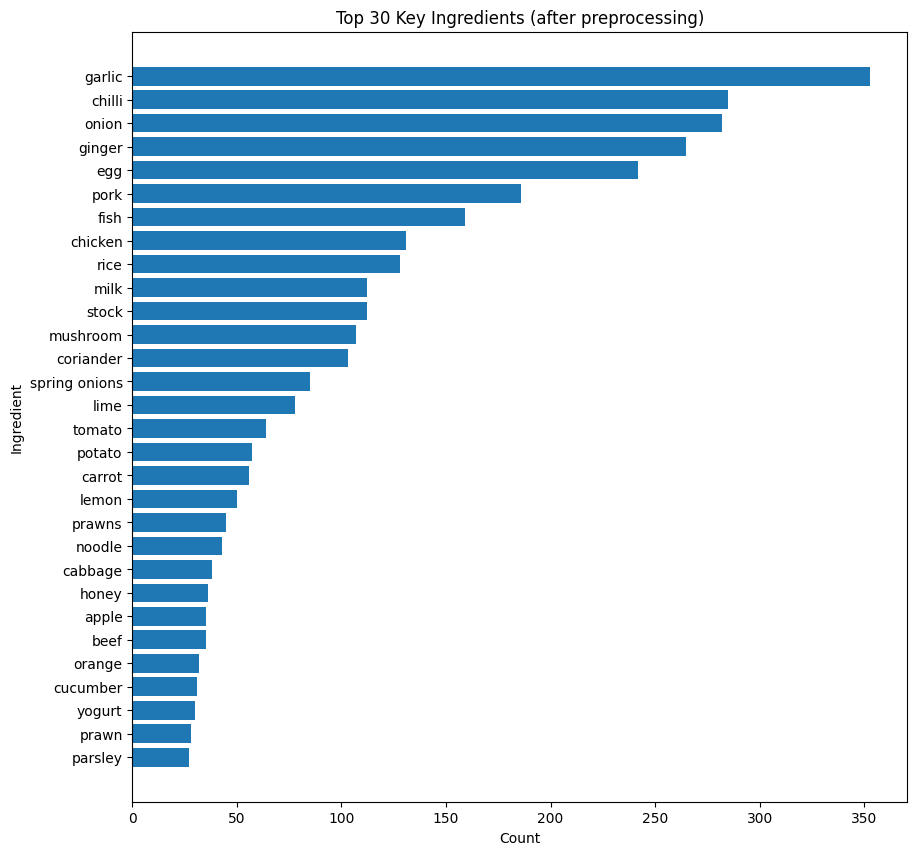

In [23]:
#Plot the occurrences of top 30 key ingredients after preprocessing 

import pandas as pd
import matplotlib.pyplot as plt

# Convert the counter to a DataFrame
key_ingredient_counts_df = pd.DataFrame.from_dict(key_ingredient_counts, orient='index').reset_index()
key_ingredient_counts_df = key_ingredient_counts_df.rename(columns={'index':'key_ingredient', 0:'count'})

# Sort the DataFrame by count
key_ingredient_counts_df = key_ingredient_counts_df.sort_values('count', ascending=False)

# Plot
plt.figure(figsize=(10,10))
plt.barh(key_ingredient_counts_df['key_ingredient'][:30], key_ingredient_counts_df['count'][:30])
plt.xlabel('Count')
plt.ylabel('Ingredient')
plt.title('Top 30 Key Ingredients (after preprocessing)')
plt.gca().invert_yaxis()
plt.show()


Comparison with ingredients before preprocessing (below). As you can see, the top 30 before preprocessing consisted mainly of condiments which isn't meaningful for our analysis. 

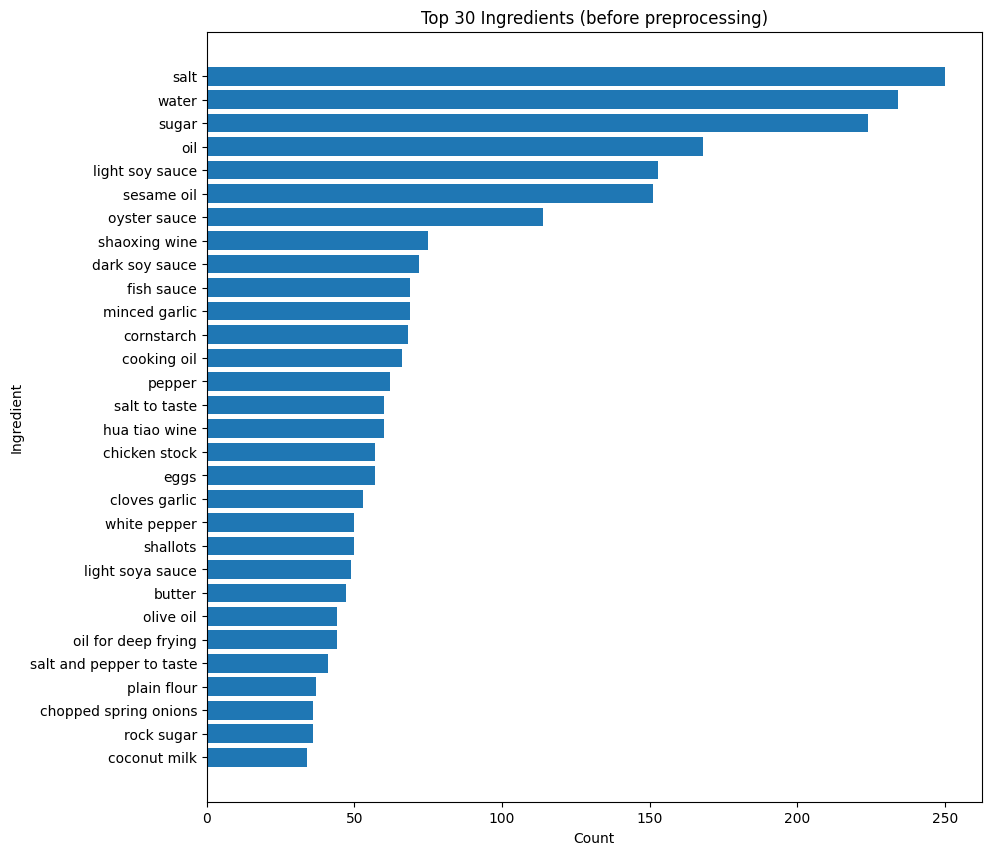

In [24]:
all_ex_ingredients = [ingredient for sublist in ingred_ex_df['ingredients_ex'] for ingredient in sublist]

ex_ingredient_counts = Counter(all_ex_ingredients)

# Convert the counter to a DataFrame
ex_ingredient_counts_df = pd.DataFrame.from_dict(ex_ingredient_counts, orient='index').reset_index()
ex_ingredient_counts_df = ex_ingredient_counts_df.rename(columns={'index':'ingredient', 0:'count'})

# Sort the DataFrame by count
ex_ingredient_counts_df = ex_ingredient_counts_df.sort_values('count', ascending=False)

# Plot
plt.figure(figsize=(10,10))
plt.barh(ex_ingredient_counts_df['ingredient'][:30], ex_ingredient_counts_df['count'][:30])
plt.xlabel('Count')
plt.ylabel('Ingredient')
plt.title('Top 30 Ingredients (before preprocessing)')
plt.gca().invert_yaxis()
plt.show()

#### Feature Extraction
Based on these top 30 key ingredients, we will create a recipe search engine. We will first extract the top 30 features via a few methods for comparison: One-Hot encoding, TF-IDF, word embeddings Word2Vec. 

In [25]:
# treat multi-word ingredients as single terms
def multi2single_terms(ingredients):
    return [ingredient.replace(' ', '_') for ingredient in ingredients]

# Apply preprocessing to key ingredients data
ingred_ex_df['key_ingred_processed'] = ingred_ex_df['key_ingredients'].apply(multi2single_terms)

all_key_ingredients_pro = [ingredient for sublist in ingred_ex_df['key_ingred_processed'] for ingredient in sublist]
key_ingredient_counts_pro = Counter(all_key_ingredients_pro)
key_ingredient_counts_pro_df = pd.DataFrame.from_dict(key_ingredient_counts_pro, orient='index').reset_index()
key_ingredient_counts_pro_df = key_ingredient_counts_pro_df.rename(columns={'index':'key_ingredient', 0:'count'})
key_ingredient_counts_pro_df = key_ingredient_counts_pro_df.sort_values('count', ascending=False)

# e.g. "rice" and "glutinous_rice" will be treated as distinct ingredients

top_30_ingredients = key_ingredient_counts_pro_df['key_ingredient'][:30].tolist()

print(top_30_ingredients)

['garlic', 'chilli', 'onion', 'ginger', 'egg', 'pork', 'fish', 'chicken', 'rice', 'milk', 'stock', 'mushroom', 'coriander', 'spring_onions', 'lime', 'tomato', 'potato', 'carrot', 'lemon', 'prawns', 'noodle', 'cabbage', 'honey', 'apple', 'beef', 'orange', 'cucumber', 'yogurt', 'prawn', 'parsley']


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a list of all the ingredients
all_key_ingredients = [' '.join(ingredients) for ingredients in ingred_ex_df['key_ingred_processed']]

# Initialize the TfidfVectorizer with the top 30 ingredients as the vocabulary
vectorizer = TfidfVectorizer(vocabulary=top_30_ingredients)

# Fit and transform the vectorizer on our corpus
tfidf_matrix = vectorizer.fit_transform(all_key_ingredients)

print(tfidf_matrix)

# Get the names of the features
features = vectorizer.get_feature_names_out()

print(features)

  (0, 14)	0.40978643169697093
  (0, 12)	0.353628473043347
  (0, 8)	0.3336608405915973
  (0, 6)	0.622155968107514
  (0, 5)	0.28835400909646985
  (0, 2)	0.2384168891625013
  (0, 1)	0.2619613151861811
  (1, 15)	0.5198597048600085
  (1, 10)	0.433901982757044
  (1, 6)	0.39660484906410487
  (1, 4)	0.3309961086667036
  (1, 2)	0.30396652668382645
  (1, 1)	0.33398418787520423
  (1, 0)	0.26585717833795647
  (3, 20)	0.44419210621387006
  (3, 12)	0.6920084473089612
  (3, 7)	0.31731500396552426
  (3, 4)	0.2540202379949871
  (3, 3)	0.2501127980740546
  (3, 2)	0.23327660787844923
  (3, 0)	0.20402990230343118
  (4, 23)	0.6011905230207145
  (4, 22)	0.5641317039549624
  (4, 8)	0.40060407351039456
  (4, 4)	0.3117053565940071
  :	:
  (659, 22)	0.7291495888971322
  (659, 8)	0.5177874128732546
  (659, 5)	0.4474785716446824
  (660, 14)	0.26908479675984104
  (660, 8)	0.21909719925451435
  (660, 7)	0.6388652623499934
  (660, 3)	0.5035638919111199
  (660, 2)	0.15655559872671945
  (660, 1)	0.34403192396540855
  

In [27]:
# illustration of how the matrix looks like with respect to the ingredients 

# Convert the sparse matrix to a dense matrix
tfidf_matrix_dense = tfidf_matrix.todense()

# Convert the dense matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix_dense, columns=features)

tfidf_df


,garlic,chilli,onion,ginger,egg,pork,fish,chicken,rice,milk,stock,mushroom,coriander,spring_onions,lime,tomato,potato,carrot,lemon,prawns,noodle,cabbage,honey,apple,beef,orange,cucumber,yogurt,prawn,parsley
0,0.000000,0.261961,0.238417,0.000000,0.000000,0.288354,0.622156,0.000000,0.333661,0.000000,0.000000,0.000000,0.353628,0.000000,0.409786,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.265857,0.333984,0.303967,0.000000,0.330996,0.000000,0.396605,0.000000,0.000000,0.000000,0.433902,0.000000,0.000000,0.000000,0.000000,0.519860,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.204030,0.000000,0.233277,0.250113,0.254020,0.000000,0.000000,0.317315,0.000000,0.000000,0.000000,0.000000,0.692008,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.444192,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.250363,0.000000,0.000000,0.000000,0.311705,0.000000,0.000000,0.000000,0.400604,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.564132,0.601191,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.257241,0.000000,0.280116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.763099,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.522535,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.242344,0.000000,0.277083,0.000000,0.301722,0.000000,0.000000,0.000000,0.000000,0.000000,0.395527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.527606,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.581936,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.219134,0.550575,0.250546,0.000000,0.272825,0.000000,0.000000,0.000000,0.000000,0.000000,0.715291,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.240594,0.000000,0.275082,0.000000,0.299543,0.332698,0.000000,0.000000,0.000000,0.000000,0.392670,0.000000,0.000000,0.421979,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.577732,0.000000


#### Next, we proceed to build our model via content-based filtering. This approach recommends recipes based on their ingredients. The idea is to recommend recipes that are similar to the ones based on the user's ingredient inputs. 

To implement content-based filtering, we will need to measure the similarity between recipes. We will do this via: 

- **Cosine Similarity:** This measures the cosine of the angle between two vectors. It's a good choice when the dataset is binary (like a one-hot encoded ingredient matrix), because it only considers the dimensions where both vectors are non-zero.

- **Jaccard Similarity:** This measures the size of the intersection of two sets divided by the size of their union. It's a good choice when the dataset is binary and equal weight is given to matches and non-matches.



In [28]:
def get_recommendations_with_score(ingredients, N):
    
    # Transform the ingredients into a TF-IDF vector
    ingredients_vector = vectorizer.transform([' '.join(ingredients)])

    # Compute the cosine similarity between the TFIDF of input ingredients and
    # TFIDF of the top 30 common key ingredients among the 674 recipes
    similarity_scores = cosine_similarity(ingredients_vector, tfidf_matrix)

    # Get the indices and scores of the top N recipes
    top_recipe_indices = np.argsort(similarity_scores[0])[-N:]
    top_recipe_scores = np.sort(similarity_scores[0])[-N:]

    # Sort the indices and scores in descending order
    top_recipe_indices = top_recipe_indices[::-1]
    top_recipe_scores = top_recipe_scores[::-1]

    # Get the top N recipe recommendations
    top_recipes = ingred_ex_df.iloc[top_recipe_indices]

    # Add the similarity scores to the DataFrame
    top_recipes['similarity_score'] = top_recipe_scores

    return top_recipes


In [29]:
# test_ingred = ['garlic','onion','pork']
test_ingred = ['garlic','onion','rice']

In [30]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import jaccard_score

# test
get_recommendations_with_score(test_ingred, 5)


,recipe_name,ingredients_ex,n_directions,n_all_ingredients,ingredients_processed,key_ingredients,key_ingred_processed,similarity_score
544,bamboo steamed pork ribs rice,"[heavenly rice, water, oil, spare ribs (cut into cm chunks), spring onion (chopped), oyster sauce, shaoxing wine, sesame oil, light soya sauce, sugar, water, oil, fermented black beans, diced red chillies, minced garlic, minced ginger, cornflour]",8,17,"[rice, water, oil, spare ribs, onion, oyster sauce, shaoxing wine, oil, light soya sauce, sugar, water, oil, fermented black beans, chilli, garlic, ginger, cornflour]","[rice, spare ribs, onion, fermented black beans, chilli, garlic, ginger]","[rice, spare_ribs, onion, fermented_black_beans, chilli, garlic, ginger]",0.782552
469,kimchi fried rice,"[cooked rice (preferably overnight), kimchi, kimchi juice, bacon, gochujang, sesame oil, spring onion (chopped), toasted sesame seeds, sheet roasted seaweed, eggs, oil]",7,11,"[rice, kimchi, kimchi juice, bacon, gochujang, oil, onion, sesame seeds, sheet roasted seaweed, egg, oil]","[rice, kimchi, kimchi juice, bacon, gochujang, onion, sesame seeds, sheet roasted seaweed, egg]","[rice, kimchi, kimchi_juice, bacon, gochujang, onion, sesame_seeds, sheet_roasted_seaweed, egg]",0.753141
217,claypot rice salted fish,"[boneless chicken thigh (cut into bite sizes), jasmine long grain rice, chicken stock / water, grated ginger, light soy sauce, dark soy sauce, oyster sauce, rice wine / shaoxing wine, sesame oil, dash pepper, cornstarch, chopped garlic, dried mushrooms (pre-soak for at least hour, sliced), lap cheong a.k.a. chinese sausage (re-soak and remove skin), big salted fish, – stalks bok choy a.k.a. xiao bai cai (blanch), shallots (sliced thinly), stalks scallions (garnishing)]",12,18,"[chicken, rice, water, ginger, soy sauce, soy sauce, oyster sauce, rice, oil, pepper, cornstarch, garlic, mushroom, sausage, fish, – bok choy a.k.a. xiao bai cai, onion, scallions]","[chicken, rice, ginger, rice, garlic, mushroom, sausage, fish, – bok choy a.k.a. xiao bai cai, onion, scallions]","[chicken, rice, ginger, rice, garlic, mushroom, sausage, fish, –____bok_choy_a.k.a._xiao_bai_cai, onion, scallions]",0.725233
362,luncheonmeat fried rice,"[overnight cooked rice, luncheon meat, eggs, french beans, light soy sauce, oyster sauce, sesame oil, cloves minced garlic, salt and white pepper to taste, for cooking]",9,10,"[rice, luncheon meat, egg, french beans, soy sauce, oyster sauce, oil, garlic]","[rice, luncheon meat, egg, french beans, garlic]","[rice, luncheon_meat, egg, french_beans, garlic]",0.713849
94,one pot yam rice,"[yam (cut into ), rice, dried shrimps (pre-soaked, roughly chopped), pcs dried mushrooms (pre-soaked, chopped into small ) (reserve liquid), chinese sausages (pre-soaked, chopped into small ), pork belly (cut into approx. cm thick), shallots (sliced thinly), cloves garlic (minced), water, cooking oil, scallions for garnishing, oyster sauce, light soy sauce, dark soy sauce, sesame oil, shaoxing wine, sugar, white pepper]",8,18,"[yam, rice, shrimps, mushroom, sausage, pork, onion, garlic, water, oil, scallions ing, oyster sauce, soy sauce, soy sauce, oil, shaoxing wine, sugar, pepper]","[yam, rice, shrimps, mushroom, sausage, pork, onion, garlic, scallions ing]","[yam, rice, shrimps, mushroom, sausage, pork, onion, garlic, scallions_ing]",0.710770


### Optimising the recommendations

From our earlier problem statement of maximising the most of existing ingredients, we have identified two types of user personas: 
- User A: a user who wishes to reduce food waste and maximise all ingredients in one meal, e.g. before a trip, or if they are expiring soon 
- User B: a user who wishes to stretch every dollar and maximise the most number of dishes out of what they have at home 

For user A, it would be crucial to ensure that recipes with the highest proportion of existing ingredients are recommended. 

For user B, it would be crucial to ensure that a mix and match of different recipes with the lowest proportion of existing ingredients are recommended. 

In both cases, it would be ideal to NOT require the users to purchase more ingredients. 

Example: 
Given onion, tomato and chicken, 
- User A would prefer to be recommended recipes that utilise all 3 ingredients; 
- User B would prefer to be recommended recipes that utilise different subsets of ingredients so that more dishes or meals can be made. 

We will tweak the function to cater to these two personas. 

In [31]:
def get_recommendations_with_score_adjusted(ingredients, N):
    # Transform the ingredients into a TF-IDF vector
    ingredients_vector = vectorizer.transform([' '.join(ingredients)])

    # Compute the cosine similarity between the TFIDF of input ingredients and
    # TFIDF of the top 30 common key ingredients among the 674 recipes
    similarity_scores = cosine_similarity(ingredients_vector, tfidf_matrix)

    # Adjust the similarity scores favouring the least number of ingredients in each recipe
    adjusted_similarity_scores = similarity_scores[0] / (np.log1p(ingred_ex_df['n_all_ingredients'])) 

    # Get the indices and scores of the top N recipes
    top_recipe_indices = np.argsort(adjusted_similarity_scores)[-N:]
    top_recipe_scores = np.sort(adjusted_similarity_scores)[-N:]

    # Sort the indices and scores in descending order
    top_recipe_indices = top_recipe_indices[::-1]
    top_recipe_scores = top_recipe_scores[::-1]

    # Get the top N recipe recommendations
    top_recipes = ingred_ex_df.iloc[top_recipe_indices]

    # Add the similarity scores to the DataFrame
    top_recipes['similarity_score'] = top_recipe_scores
    
  
    return top_recipes


In [32]:
get_recommendations_with_score_adjusted(test_ingred,5)

,recipe_name,ingredients_ex,n_directions,n_all_ingredients,ingredients_processed,key_ingredients,key_ingred_processed,similarity_score
469,kimchi fried rice,"[cooked rice (preferably overnight), kimchi, kimchi juice, bacon, gochujang, sesame oil, spring onion (chopped), toasted sesame seeds, sheet roasted seaweed, eggs, oil]",7,11,"[rice, kimchi, kimchi juice, bacon, gochujang, oil, onion, sesame seeds, sheet roasted seaweed, egg, oil]","[rice, kimchi, kimchi juice, bacon, gochujang, onion, sesame seeds, sheet roasted seaweed, egg]","[rice, kimchi, kimchi_juice, bacon, gochujang, onion, sesame_seeds, sheet_roasted_seaweed, egg]",0.303086
362,luncheonmeat fried rice,"[overnight cooked rice, luncheon meat, eggs, french beans, light soy sauce, oyster sauce, sesame oil, cloves minced garlic, salt and white pepper to taste, for cooking]",9,10,"[rice, luncheon meat, egg, french beans, soy sauce, oyster sauce, oil, garlic]","[rice, luncheon meat, egg, french beans, garlic]","[rice, luncheon_meat, egg, french_beans, garlic]",0.297698
544,bamboo steamed pork ribs rice,"[heavenly rice, water, oil, spare ribs (cut into cm chunks), spring onion (chopped), oyster sauce, shaoxing wine, sesame oil, light soya sauce, sugar, water, oil, fermented black beans, diced red chillies, minced garlic, minced ginger, cornflour]",8,17,"[rice, water, oil, spare ribs, onion, oyster sauce, shaoxing wine, oil, light soya sauce, sugar, water, oil, fermented black beans, chilli, garlic, ginger, cornflour]","[rice, spare ribs, onion, fermented black beans, chilli, garlic, ginger]","[rice, spare_ribs, onion, fermented_black_beans, chilli, garlic, ginger]",0.270745
561,waxed meat claypot rice lap mei fun,"[rice, water, chinese sausage, chinese liver sausage, waxed duck thigh, waxed pork belly, arrowroot (peeled & sliced), stalks mustard green, salt, chinese rice wine, knife premium cooking oil]",15,11,"[rice, water, sausage, sausage, duck, pork, arrowroot, mustard green, salt, rice, oil]","[rice, sausage, sausage, duck, pork, arrowroot, mustard green, rice]","[rice, sausage, sausage, duck, pork, arrowroot, mustard_green, rice]",0.267921
240,stb chwee kueh,"[chye poh (preserved sweet turnips), oil, minced garlic, minced shallots, sugar, white pepper, dark soy sauce, rice flour, wheat flour, salt, oil, water, boiling water]",12,13,"[chye poh, oil, garlic, onion, sugar, pepper, soy sauce, flour, flour, salt, oil, water, water]","[chye poh, garlic, onion]","[chye_poh, garlic, onion]",0.260881


In [33]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import jaccard_score

# Initialize the MultiLabelBinarizer with the top 30 common ingredients
mlb = MultiLabelBinarizer(classes=top_30_ingredients)

# Fit and transform the 'key_ingredients' column
one_hot_encoded = mlb.fit_transform(ingred_ex_df['key_ingred_processed'])

# Convert the one-hot encoded matrix into a DataFrame
one_hot_df = pd.DataFrame(one_hot_encoded, columns=mlb.classes_)

def get_cosine_onehot(ingredients, N):
    # Create a binary vector for the input ingredients
    ingredients_vector = np.isin(mlb.classes_, ingredients).astype(int).reshape(1, -1)

    # Compute the cosine similarity between the TFIDF of input ingredients and
    # TFIDF of the top 30 common key ingredients among the 674 recipes
    similarity_scores = cosine_similarity(ingredients_vector, one_hot_encoded)[0]

    # Get the indices and scores of the top N recipes
    top_recipe_indices = np.argsort(similarity_scores)[-N:]
    top_recipe_scores = np.sort(similarity_scores)[-N:]

    # Sort the indices and scores in descending order
    top_recipe_indices = top_recipe_indices[::-1]
    top_recipe_scores = top_recipe_scores[::-1]

    # Get the top N recipe recommendations
    top_recipes = ingred_ex_df.iloc[top_recipe_indices]

    # Add the similarity scores to the DataFrame
    top_recipes['similarity_score'] = top_recipe_scores
      
    return top_recipes

def get_cosine_onehot_adjusted(ingredients, N):
    # Create a binary vector for the input ingredients
    ingredients_vector = np.isin(mlb.classes_, ingredients).astype(int).reshape(1, -1)

    # Compute the cosine similarity between the TFIDF of input ingredients and
    # TFIDF of the top 30 common key ingredients among the 674 recipes
    similarity_scores = cosine_similarity(ingredients_vector, one_hot_encoded)[0]

    # Adjust the similarity scores favouring the least number of ingredients in each recipe
    adjusted_similarity_scores = similarity_scores[0] / (np.log1p(ingred_ex_df['n_all_ingredients'])) 

    # Get the indices and scores of the top N recipes
    top_recipe_indices = np.argsort(adjusted_similarity_scores)[-N:]
    top_recipe_scores = np.sort(adjusted_similarity_scores)[-N:]

    # Sort the indices and scores in descending order
    top_recipe_indices = top_recipe_indices[::-1]
    top_recipe_scores = top_recipe_scores[::-1]

    # Get the top N recipe recommendations
    top_recipes = ingred_ex_df.iloc[top_recipe_indices]

    # Add the similarity scores to the DataFrame
    top_recipes['similarity_score'] = top_recipe_scores
      
    return top_recipes

def get_jaccard_rec(ingredients, N):
    # Create a binary vector for the input ingredients
    ingredients_vector = np.isin(mlb.classes_, ingredients).astype(int)

    # Compute the Jaccard similarity between the binary vector of input ingredients and
    # binary vectors of the key ingredients among the 674 recipes
    similarity_scores = [jaccard_score(ingredients_vector, row) for row in one_hot_encoded]

    # Adjust the similarity scores favouring the least number of ingredients in each recipe
    adjusted_similarity_scores = similarity_scores[0] 
    
    # Get the indices and scores of the top N recipes
    top_recipe_indices = np.argsort(similarity_scores)[-N:]
    top_recipe_scores = np.sort(similarity_scores)[-N:]

    # Sort the indices and scores in descending order
    top_recipe_indices = top_recipe_indices[::-1]
    top_recipe_scores = top_recipe_scores[::-1]

    # Get the top N recipe recommendations
    top_recipes = ingred_ex_df.iloc[top_recipe_indices]

    # Add the similarity scores to the DataFrame
    top_recipes['similarity_score'] = top_recipe_scores

    return top_recipes

def get_jaccard_rec_adj(ingredients, N):
    # Create a binary vector for the input ingredients
    ingredients_vector = np.isin(mlb.classes_, ingredients).astype(int)

    # Compute the Jaccard similarity between the binary vector of input ingredients and
    # binary vectors of the key ingredients among the 674 recipes
    similarity_scores = [jaccard_score(ingredients_vector, row) for row in one_hot_encoded]

    # Adjust the similarity scores favouring the least number of ingredients in each recipe
    adjusted_similarity_scores = similarity_scores[0] / (np.log1p(ingred_ex_df['n_all_ingredients'])) 
    
    # Get the indices and scores of the top N recipes
    top_recipe_indices = np.argsort(similarity_scores)[-N:]
    top_recipe_scores = np.sort(similarity_scores)[-N:]

    # Sort the indices and scores in descending order
    top_recipe_indices = top_recipe_indices[::-1]
    top_recipe_scores = top_recipe_scores[::-1]

    # Get the top N recipe recommendations
    top_recipes = ingred_ex_df.iloc[top_recipe_indices]

    # Add the similarity scores to the DataFrame
    top_recipes['similarity_score'] = top_recipe_scores

    return top_recipes




In [34]:
get_cosine_onehot(test_ingred,5)

,recipe_name,ingredients_ex,n_directions,n_all_ingredients,ingredients_processed,key_ingredients,key_ingred_processed,similarity_score
240,stb chwee kueh,"[chye poh (preserved sweet turnips), oil, minced garlic, minced shallots, sugar, white pepper, dark soy sauce, rice flour, wheat flour, salt, oil, water, boiling water]",12,13,"[chye poh, oil, garlic, onion, sugar, pepper, soy sauce, flour, flour, salt, oil, water, water]","[chye poh, garlic, onion]","[chye_poh, garlic, onion]",0.816497
718,chwee kueh,"[chye poh (preserved radish), oil, minced garlic, chopped shallots, sugar, white pepper, dark soya sauce, rice flour, wheat flour, salt, oil, water, boiling water]",22,13,"[chye poh, oil, garlic, onion, sugar, pepper, dark soya sauce, flour, flour, salt, oil, water, water]","[chye poh, garlic, onion]","[chye_poh, garlic, onion]",0.816497
544,bamboo steamed pork ribs rice,"[heavenly rice, water, oil, spare ribs (cut into cm chunks), spring onion (chopped), oyster sauce, shaoxing wine, sesame oil, light soya sauce, sugar, water, oil, fermented black beans, diced red chillies, minced garlic, minced ginger, cornflour]",8,17,"[rice, water, oil, spare ribs, onion, oyster sauce, shaoxing wine, oil, light soya sauce, sugar, water, oil, fermented black beans, chilli, garlic, ginger, cornflour]","[rice, spare ribs, onion, fermented black beans, chilli, garlic, ginger]","[rice, spare_ribs, onion, fermented_black_beans, chilli, garlic, ginger]",0.774597
94,one pot yam rice,"[yam (cut into ), rice, dried shrimps (pre-soaked, roughly chopped), pcs dried mushrooms (pre-soaked, chopped into small ) (reserve liquid), chinese sausages (pre-soaked, chopped into small ), pork belly (cut into approx. cm thick), shallots (sliced thinly), cloves garlic (minced), water, cooking oil, scallions for garnishing, oyster sauce, light soy sauce, dark soy sauce, sesame oil, shaoxing wine, sugar, white pepper]",8,18,"[yam, rice, shrimps, mushroom, sausage, pork, onion, garlic, water, oil, scallions ing, oyster sauce, soy sauce, soy sauce, oil, shaoxing wine, sugar, pepper]","[yam, rice, shrimps, mushroom, sausage, pork, onion, garlic, scallions ing]","[yam, rice, shrimps, mushroom, sausage, pork, onion, garlic, scallions_ing]",0.774597
80,rice cooker scallops rice,"[grains rice, water, pieces prawns, pork belly (cut into bite sizes), pieces fresh scallops, fragrant oil, minced shallots, minced garlic, scallions (garnishing), oyster sauce, light soy sauce, cooking wine, sugar, pepper to taste]",6,14,"[rice, water, prawns, pork, scallops, oil, onion, garlic, scallions, oyster sauce, soy sauce, cooking wine, sugar]","[rice, prawns, pork, scallops, onion, garlic, scallions]","[rice, prawns, pork, scallops, onion, garlic, scallions]",0.774597


In [35]:
get_cosine_onehot_adjusted(test_ingred,5)

,recipe_name,ingredients_ex,n_directions,n_all_ingredients,ingredients_processed,key_ingredients,key_ingred_processed,similarity_score
267,tonkotsu chashu soy milk ramen,[servings ramen noodles],9,1,[noodle],[noodle],[noodle],0.629644
537,homemade fruit popsicles,[any combination fruits],7,1,[any combination fruits],[any combination fruits],[any_combination___fruits],0.629644
580,turkey meatball lasagna,"[sheets san remo instant lasagna, mixed cheese (mozzarella and cheddar)]",15,2,"[sheets san remo instant lasagna, mixed cheese]","[sheets san remo instant lasagna, mixed cheese]","[sheets_san_remo_instant_lasagna, mixed_cheese]",0.397261
277,chicken satay with peanut sauce,"[large skinless chicken thighs (cut into bite size), bamboo skewers]",9,2,"[chicken, bamboo skewers]","[chicken, bamboo skewers]","[chicken, bamboo_skewers]",0.397261
563,arrowhead chips,"[arrowroot (choose big round ones firm stems), salt to taste, oil for deep frying]",9,3,"[arrowroot, oil]",[arrowroot],[arrowroot],0.314822


In [36]:
get_jaccard_rec(test_ingred,5)

,recipe_name,ingredients_ex,n_directions,n_all_ingredients,ingredients_processed,key_ingredients,key_ingred_processed,similarity_score
718,chwee kueh,"[chye poh (preserved radish), oil, minced garlic, chopped shallots, sugar, white pepper, dark soya sauce, rice flour, wheat flour, salt, oil, water, boiling water]",22,13,"[chye poh, oil, garlic, onion, sugar, pepper, dark soya sauce, flour, flour, salt, oil, water, water]","[chye poh, garlic, onion]","[chye_poh, garlic, onion]",0.666667
240,stb chwee kueh,"[chye poh (preserved sweet turnips), oil, minced garlic, minced shallots, sugar, white pepper, dark soy sauce, rice flour, wheat flour, salt, oil, water, boiling water]",12,13,"[chye poh, oil, garlic, onion, sugar, pepper, soy sauce, flour, flour, salt, oil, water, water]","[chye poh, garlic, onion]","[chye_poh, garlic, onion]",0.666667
544,bamboo steamed pork ribs rice,"[heavenly rice, water, oil, spare ribs (cut into cm chunks), spring onion (chopped), oyster sauce, shaoxing wine, sesame oil, light soya sauce, sugar, water, oil, fermented black beans, diced red chillies, minced garlic, minced ginger, cornflour]",8,17,"[rice, water, oil, spare ribs, onion, oyster sauce, shaoxing wine, oil, light soya sauce, sugar, water, oil, fermented black beans, chilli, garlic, ginger, cornflour]","[rice, spare ribs, onion, fermented black beans, chilli, garlic, ginger]","[rice, spare_ribs, onion, fermented_black_beans, chilli, garlic, ginger]",0.600000
80,rice cooker scallops rice,"[grains rice, water, pieces prawns, pork belly (cut into bite sizes), pieces fresh scallops, fragrant oil, minced shallots, minced garlic, scallions (garnishing), oyster sauce, light soy sauce, cooking wine, sugar, pepper to taste]",6,14,"[rice, water, prawns, pork, scallops, oil, onion, garlic, scallions, oyster sauce, soy sauce, cooking wine, sugar]","[rice, prawns, pork, scallops, onion, garlic, scallions]","[rice, prawns, pork, scallops, onion, garlic, scallions]",0.600000
94,one pot yam rice,"[yam (cut into ), rice, dried shrimps (pre-soaked, roughly chopped), pcs dried mushrooms (pre-soaked, chopped into small ) (reserve liquid), chinese sausages (pre-soaked, chopped into small ), pork belly (cut into approx. cm thick), shallots (sliced thinly), cloves garlic (minced), water, cooking oil, scallions for garnishing, oyster sauce, light soy sauce, dark soy sauce, sesame oil, shaoxing wine, sugar, white pepper]",8,18,"[yam, rice, shrimps, mushroom, sausage, pork, onion, garlic, water, oil, scallions ing, oyster sauce, soy sauce, soy sauce, oil, shaoxing wine, sugar, pepper]","[yam, rice, shrimps, mushroom, sausage, pork, onion, garlic, scallions ing]","[yam, rice, shrimps, mushroom, sausage, pork, onion, garlic, scallions_ing]",0.600000


In [37]:
get_jaccard_rec_adj(test_ingred,5)

,recipe_name,ingredients_ex,n_directions,n_all_ingredients,ingredients_processed,key_ingredients,key_ingred_processed,similarity_score
718,chwee kueh,"[chye poh (preserved radish), oil, minced garlic, chopped shallots, sugar, white pepper, dark soya sauce, rice flour, wheat flour, salt, oil, water, boiling water]",22,13,"[chye poh, oil, garlic, onion, sugar, pepper, dark soya sauce, flour, flour, salt, oil, water, water]","[chye poh, garlic, onion]","[chye_poh, garlic, onion]",0.666667
240,stb chwee kueh,"[chye poh (preserved sweet turnips), oil, minced garlic, minced shallots, sugar, white pepper, dark soy sauce, rice flour, wheat flour, salt, oil, water, boiling water]",12,13,"[chye poh, oil, garlic, onion, sugar, pepper, soy sauce, flour, flour, salt, oil, water, water]","[chye poh, garlic, onion]","[chye_poh, garlic, onion]",0.666667
544,bamboo steamed pork ribs rice,"[heavenly rice, water, oil, spare ribs (cut into cm chunks), spring onion (chopped), oyster sauce, shaoxing wine, sesame oil, light soya sauce, sugar, water, oil, fermented black beans, diced red chillies, minced garlic, minced ginger, cornflour]",8,17,"[rice, water, oil, spare ribs, onion, oyster sauce, shaoxing wine, oil, light soya sauce, sugar, water, oil, fermented black beans, chilli, garlic, ginger, cornflour]","[rice, spare ribs, onion, fermented black beans, chilli, garlic, ginger]","[rice, spare_ribs, onion, fermented_black_beans, chilli, garlic, ginger]",0.600000
80,rice cooker scallops rice,"[grains rice, water, pieces prawns, pork belly (cut into bite sizes), pieces fresh scallops, fragrant oil, minced shallots, minced garlic, scallions (garnishing), oyster sauce, light soy sauce, cooking wine, sugar, pepper to taste]",6,14,"[rice, water, prawns, pork, scallops, oil, onion, garlic, scallions, oyster sauce, soy sauce, cooking wine, sugar]","[rice, prawns, pork, scallops, onion, garlic, scallions]","[rice, prawns, pork, scallops, onion, garlic, scallions]",0.600000
94,one pot yam rice,"[yam (cut into ), rice, dried shrimps (pre-soaked, roughly chopped), pcs dried mushrooms (pre-soaked, chopped into small ) (reserve liquid), chinese sausages (pre-soaked, chopped into small ), pork belly (cut into approx. cm thick), shallots (sliced thinly), cloves garlic (minced), water, cooking oil, scallions for garnishing, oyster sauce, light soy sauce, dark soy sauce, sesame oil, shaoxing wine, sugar, white pepper]",8,18,"[yam, rice, shrimps, mushroom, sausage, pork, onion, garlic, water, oil, scallions ing, oyster sauce, soy sauce, soy sauce, oil, shaoxing wine, sugar, pepper]","[yam, rice, shrimps, mushroom, sausage, pork, onion, garlic, scallions ing]","[yam, rice, shrimps, mushroom, sausage, pork, onion, garlic, scallions_ing]",0.600000


Comparing the recommendations from Jaccard and Cosine similarity approaches, it seems that Jaccard is more intuitive to understand based on its score as equal weight is given to matches and non-matches, which is the project's intent. On the contrary, Cosine similarity scoring can be hard to comprehend since it takes into account the commonness/rarity per ingredient, which does not really account for much business use here, i.e. if a user only has rice and doesn't have noodles at home, it really doesn't make much sense to suggest a recipe that uses noodles just because noodles are similar to rice in terms of it being a source of carb. Similar to xx's paper, the team also deployed a one-hot encoding and match approach, which is somewhat similar to the Jaccard approach. 

In [63]:
combined_df = pd.merge(meatmen_df, ingred_ex_df, on='recipe_name', how='inner')


def get_mod_jaccard_rec_adj(ingredients, N): #modifying the function to return based on recipe names so that the correct recipe is matched. 
    # Create a binary vector for the input ingredients
    ingredients_vector = np.isin(mlb.classes_, ingredients).astype(int)

    # Compute the Jaccard similarity between the binary vector of input ingredients and
    # binary vectors of the key ingredients among the 674 recipes
    similarity_scores = [jaccard_score(ingredients_vector, row) for row in one_hot_encoded]

    # Adjust the similarity scores favouring the least number of ingredients in each recipe
    adjusted_similarity_scores = similarity_scores[0] / (np.log1p(ingred_ex_df['n_all_ingredients'])) 
    
    # Get the indices and scores of the top N recipes
    top_recipe_indices = np.argsort(similarity_scores)[-N:]
    top_recipe_scores = np.sort(similarity_scores)[-N:]

    # Sort the indices and scores in descending order
    top_recipe_indices = top_recipe_indices[::-1]
    top_recipe_scores = top_recipe_scores[::-1]

    # Get the top N recipe names
    top_recipe_names = ingred_ex_df.iloc[top_recipe_indices]['recipe_name']

    # Create a DataFrame with the recipe names and similarity scores
    top_recipes = pd.DataFrame({
        'recipe_name': top_recipe_names,
        'similarity_score': top_recipe_scores
    })

    return top_recipes

from IPython.display import Image, display

def show_recommendations(ingredients, N):
    # Get the top N recipe recommendations
    top_recipes = get_mod_jaccard_rec_adj(ingredients, N)

    # Select the desired columns from the combined dataframe
    output = combined_df[combined_df['recipe_name'].isin(top_recipes['recipe_name'])][['recipe_name', 'image', 'ingredients', 'n_all_ingredients', 'difficulty', 'n_directions', 'prep_time', 'url']]

    # Replace the 'image' column with Image objects
    output['image'] = output['image'].apply(lambda url: Image(url=url))

    # Set 'recipe_name' as the index for both DataFrames
    top_recipes.set_index('recipe_name', inplace=True)
    output.set_index('recipe_name', inplace=True)
    
    # Add the similarity scores to the DataFrame
    output['similarity_score'] = top_recipes['similarity_score']
    
    # Sort the DataFrame by 'similarity_score' in descending order
    output.sort_values(by='similarity_score', ascending=False, inplace=True)


    return output



In [64]:
print(combined_df.shape)
print(meatmen_df.shape)
print(ingred_ex_df.shape)

(668, 14)
(668, 8)
(668, 7)


In [65]:
show_recommendations(test_ingred, 5)

,image,ingredients,n_all_ingredients,difficulty,n_directions,prep_time,url,similarity_score
recipe_name,,,,,,,,
stb chwee kueh,<IPython.core.display.Image object>,"['150g Chye Poh (preserved sweet turnips)', '½cup oil', '30g minced garlic', '60g minced shallots', '2tbsp sugar', '½tsp white pepper', '½tbsp dark soy sauce', '150g rice flour', '20g wheat flour', '1tsp salt', '2tbsp oil', '400ml water', '400ml boiling water']",13,easy,12,['1 hr'],https://themeatmen.sg/stb-chwee-kueh/,0.666667
chwee kueh,<IPython.core.display.Image object>,"['150g Chye Poh (Preserved Radish)', '½cup oil', '30g minced garlic', '60g chopped shallots', '2tbsp sugar', '½tsp white pepper', '¼tbsp dark soya sauce', '150g rice flour', '15g wheat flour', '1tsp salt', '2tbsp oil', '400ml water', '400ml boiling water']",13,easy,22,['40 min'],https://themeatmen.sg/chwee-kueh/,0.666667
rice cooker scallops rice,<IPython.core.display.Image object>,"['230g of grains of rice', '220g Water', '8 pieces prawns', '90g Pork belly (cut into bite sizes)', '8 pieces fresh scallops', '1 tbsp fragrant oil', '2 tbsp minced shallots', '2 tbsp minced garlic', 'Scallions (garnishing)', '1tbsp oyster sauce', '1 tbsp light soy sauce', '1 ½ tbsp cooking wine', '½ tbsp sugar', 'Pepper to taste']",14,easy,6,['30 mins'],https://themeatmen.sg/rice-cooker-scallops-rice/,0.600000
one pot yam rice,<IPython.core.display.Image object>,"['220g Yam (cut into cubes)', '2cups Rice', '60g Dried shrimps (pre-soaked, roughly chopped)', '8pcs Dried mushrooms (pre-soaked, chopped into small cubes) (reserve 250ml of liquid)', '80g Chinese sausages (pre-soaked, chopped into small cubes)', '450g Pork belly (cut into approx. 1cm thick)', '10Shallots (sliced thinly)', '6cloves Garlic (minced)', '100ml Water', '2tbsp Cooking oil', 'Scallions for garnishing', '1½tbsp Oyster sauce', '2tbsp Light soy sauce', '1½tbsp Dark soy sauce', '1tbsp Sesame oil', '2tbsp Shaoxing wine', '½tsp Sugar', '½tsp White pepper']",18,easy,8,['45 min'],https://themeatmen.sg/one-pot-yam-rice/,0.600000
bamboo steamed pork ribs rice,<IPython.core.display.Image object>,"['250g heavenly rice', '300ml water', '1tsp oil', '400g spare ribs (cut into 4cm chunks)', '1spring onion (chopped)', '1tbsp oyster sauce', '1tbsp Shaoxing wine', '1tsp sesame oil', '2tsp light soya sauce', '½tsp sugar', '2tbsp water', '1tbsp oil', '1½tbsp fermented black beans', '1tbsp diced red chillies', '1tbsp minced garlic', '1tbsp minced ginger', '1tbsp cornflour']",17,easy,8,['1 hr'],https://themeatmen.sg/bamboo-steamed-pork-ribs-rice/,0.600000


## EDA

In [ ]:

fig, axs = plt.subplots(2)

# Plot histogram for number of ingredients
axs[0].hist(ingred_ex_df['n_all_ingredients'], bins=20, color='blue', alpha=0.7)
axs[0].set_title('Number of Ingredients')

# Plot histogram for number of steps
axs[1].hist(ingred_ex_df['n_directions'], bins=20, color='green', alpha=0.7)
axs[1].set_title('Number of Steps')

plt.tight_layout()
plt.show()


In [ ]:
ingred_ex_df[['n_directions', 'n_all_ingredients']].describe()